### ➰ 목표

: 축구 21-22시즌 프리미어리그 선수들의 스탯을 나타내는 데이터 파일을 분석하여 각 팀에 대한 스탯을 담은 데이터프레임을 생성해 최종 승점을 내고 실제 21-22시즌의 승점 순위와 얼마나 차이가 나는 가를 비교 분석하고자 합니다.
<br><br>

### ➰ 각 팀에 대한 스탯을 담은 데이터프레임 내 컬럼 종류
: 승점을 내기 위해 승점을 판단할 수 있는 6가지 요소를 컬럼으로 지정해 데이터 프레임을 생성하고자 합니다.<br>

1. 팀별 득점수
2. (공격수 + 미드필더)의 나이에 따른 평균 득점률
3. (공격수 + 미드필더) 국적에 따른 평균 득점률
4. 선수의 평균 지구력
5. 경고 카드 평균 누적량
6. (실제 골 - 예상 골) 평균 수치
<br><br>

### ➰ 분석과정
- 데이터 전처리하기
- 팀 스탯 데이터 프레임에 추가할 컬럼 생성
- 승점 데이터프레임 생성
- 실제 승점과 비교분석하기





---



### ⚽ 데이터 전처리하기

- 프로젝트를 진행하기 위해 필요한 라이브러리

In [1]:
import chardet # csv파일 인코딩 확인하기 위한 라이브러리

import pandas as pd # 데이터프레임 생성을 위한 라이브러리
import missingno as msno # 결측치 확인을 위한 라이브러리

# 시각화를 위한 라이브러리
import seaborn as sns 
import matplotlib.pyplot as plt

# 코드 실행시 발생하는 경고를 무시하기 위함
import warnings
warnings.filterwarnings('ignore')

- 데이터 가져오기
: 오류 발생, 오류 해결


In [2]:
path = "리그.csv"

try :
    premier_league = pd.read_csv(path)
    print(premier_league)
except Exception as e: # 파일을 열었을 때 발생한 에러 출력
    print(f'에러 : {e}')

에러 : 'utf-8' codec can't decode byte 0xa0 in position 169: invalid start byte


In [3]:
with open(path, 'rb')as f:
    text = f.read()

result = chardet.detect(text) # csv파일 내 정보 출력
print(result)
enc = result['encoding'] # encoding에 해당하는 부분을 출력했더니 
print(enc) # Windows-1252임을 확인할 수 있음

{'encoding': 'Windows-1252', 'confidence': 0.7298079067727586, 'language': ''}
Windows-1252


- 데이터 가져오기

In [4]:
premier_league = pd.read_csv(path, encoding="Windows-1252")
# pandas를 이용하여 데이터 호출하기

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
# 데이터가 잘리는 것 없이 확인하기 위함

print(premier_league.shape) # 총 30개의 컬럼을 가진 691개의 데이터 확인 가능
premier_league.head() # 데이터 확인

(691, 30)


,Player,Team,Nation,Pos,Age,MP,Starts,Min,90s,Gls,Ast,G-PK,PK,PKatt,CrdY,CrdR,Gls.1,Ast.1,G+A,G-PK.1,G+A-PK,xG,npxG,xA,npxG+xA,xG.1,xA.1,xG+xA,npxG.1,npxG+xA.1
0,Bukayo Saka,Arsenal,eng ENG,"FW,MF",19.0,38,36,"2,978",33.1,11.0,7.0,9.0,2.0,2.0,6.0,0.0,0.33,0.21,0.54,0.27,0.48,9.7,8.2,6.9,15.2,0.29,0.21,0.50,0.25,0.46
1,Gabriel Dos Santos,Arsenal,br BRA,DF,23.0,35,35,"3,063",34.0,5.0,0.0,5.0,0.0,0.0,8.0,1.0,0.15,0.00,0.15,0.15,0.15,2.7,2.7,0.8,3.5,0.08,0.02,0.10,0.08,0.10
2,Aaron Ramsdale,Arsenal,eng ENG,GK,23.0,34,34,"3,060",34.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00
3,Ben White,Arsenal,eng ENG,DF,23.0,32,32,"2,880",32.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.00,0.00,0.00,0.00,0.00,1.0,1.0,0.6,1.6,0.03,0.02,0.05,0.03,0.05
4,Martin Ødegaard,Arsenal,no NOR,MF,22.0,36,32,"2,785",30.9,7.0,4.0,7.0,0.0,0.0,4.0,0.0,0.23,0.13,0.36,0.23,0.36,4.8,4.8,6.8,11.6,0.16,0.22,0.38,0.16,0.38


- 데이터 프레임 내의 컬럼 설명



||||데이터 컬럼 설명||||
|---|---|---|---|---|---|---|
|Player|플레이어의 이름|Team|2021-2020년에 활약한 클럽|Nation|플레이어의 국가|
|Pos|포지션|Age|플레이어의 나이|MP|플레이한 경기|
|starts|경기 시작|Min|재생 시간|90s|플레이 시간을 90으로 나눈 값|
|Gls|득점 또는 허용된 골|AST|어시스트|G-PK|무승부 골|
|PK|페널티킥|PKatt|승부차기 참가|CrdY|옐로우 카드|
|CrdR|레드 카드|Gls|90분당 득점|Ast|90분당 어시스트|
|G+A|90분당 골 및 어시스트|G-PK|90분당 득점에서 페널티킥을 뺀 횟수|G+A-PK|90분당 득점 + 어시스트 - 페널티 킥|
|xG|예상 골|npxG|페널티 없는 예상 골|xA|예상 지원
|npxG+xA|페널티 없는 예상 골 + 예상 어시스트|xG|90분당 예상 골|npxG|90분당 페널티 없는 예상 골|
|xA|90분당 예상 어시스트|npxG+xA|페널티 없는 예상 골 + 90분당 예상 어시스트

- 사용할 컬럼만을 따로 담은 데이터 프레임 생성

In [5]:
R_PL = premier_league[["Team",	"Nation",	"Pos", "Age", "MP",	"Min",	"Gls",	"CrdY",	"CrdR",	"xG"]]
# 사용할 컬럼만 따로 저장한 데이터프레임 생성

R_PL.head() # 데이터 확인

,Team,Nation,Pos,Age,MP,Min,Gls,CrdY,CrdR,xG
0,Arsenal,eng ENG,"FW,MF",19.0,38,"2,978",11.0,6.0,0.0,9.7
1,Arsenal,br BRA,DF,23.0,35,"3,063",5.0,8.0,1.0,2.7
2,Arsenal,eng ENG,GK,23.0,34,"3,060",0.0,1.0,0.0,0.0
3,Arsenal,eng ENG,DF,23.0,32,"2,880",0.0,3.0,0.0,1.0
4,Arsenal,no NOR,MF,22.0,36,"2,785",7.0,4.0,0.0,4.8


- 결측치 확인

column:       Team	 Percent of NaN value:0.00%
column:     Nation	 Percent of NaN value:0.43%
column:        Pos	 Percent of NaN value:0.00%
column:        Age	 Percent of NaN value:0.58%
column:         MP	 Percent of NaN value:0.00%
column:        Min	 Percent of NaN value:20.98%
column:        Gls	 Percent of NaN value:20.84%
column:       CrdY	 Percent of NaN value:20.84%
column:       CrdR	 Percent of NaN value:20.84%
column:         xG	 Percent of NaN value:20.98%


<AxesSubplot:>

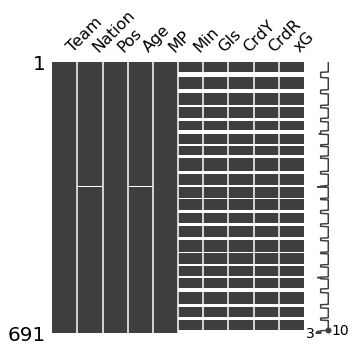

In [6]:
for col in R_PL.columns:
  msg = 'column: {:>10}\t Percent of NaN value:{:.2f}%'.format(col, 100 * (premier_league[col].isnull().sum() / premier_league[col].shape[0]))
  # isnull함수를 통해 결측치 비율 확인
  
  print(msg)

msno.matrix(df = R_PL.iloc[:, :], figsize=(5, 5))
# missingno 라이브러리를 통한 결측치 시각화

- 결측치 제거

In [7]:
# 컬럼 min이 결측치에 해당하는 경우 행 제거

print(f'결측치 제거 전 행 수 : {len(R_PL)}')

not_a_number =  R_PL[R_PL["Min"].isnull()==True].index  # 결측치에 해당하는 인덱스 추출

R_PL.drop(not_a_number, inplace=True) # 결측치에 해당하는 행 제거
R_PL.reset_index(drop=True, inplace=True) # 인덱스 정렬

print(f'결측치 제거 후 행 수 : {len(R_PL)}')

R_PL.head() # 데이터 확인


결측치 제거 전 행 수 : 691
결측치 제거 후 행 수 : 546


,Team,Nation,Pos,Age,MP,Min,Gls,CrdY,CrdR,xG
0,Arsenal,eng ENG,"FW,MF",19.0,38,"2,978",11.0,6.0,0.0,9.7
1,Arsenal,br BRA,DF,23.0,35,"3,063",5.0,8.0,1.0,2.7
2,Arsenal,eng ENG,GK,23.0,34,"3,060",0.0,1.0,0.0,0.0
3,Arsenal,eng ENG,DF,23.0,32,"2,880",0.0,3.0,0.0,1.0
4,Arsenal,no NOR,MF,22.0,36,"2,785",7.0,4.0,0.0,4.8


- 추후 국가별 평균 득점률을 내기 위한 Nation컬럼 전처리
<br>
: 국가를 나타내는 맨 뒤의 대문자만 남기고 제거


In [8]:
R_PL['Nation'][0] # Nation 데이터 확인

'eng\xa0ENG'

In [9]:
# 국가 컬럼 전처리
nation = R_PL['Nation'].copy()

for i in range(len(nation)):
    nation[i] = nation[i][-3:]
    # nation 컬럼 데이터 내의 국가를 나타내는 맨 뒤의 대문자만 따로 추출

R_PL['Nation'] = nation # R_PL 데이터 프레임 nation에 덮어씌우기

R_PL.head() # 데이터 확인

,Team,Nation,Pos,Age,MP,Min,Gls,CrdY,CrdR,xG
0,Arsenal,ENG,"FW,MF",19.0,38,"2,978",11.0,6.0,0.0,9.7
1,Arsenal,BRA,DF,23.0,35,"3,063",5.0,8.0,1.0,2.7
2,Arsenal,ENG,GK,23.0,34,"3,060",0.0,1.0,0.0,0.0
3,Arsenal,ENG,DF,23.0,32,"2,880",0.0,3.0,0.0,1.0
4,Arsenal,NOR,MF,22.0,36,"2,785",7.0,4.0,0.0,4.8


- 전처리가 완료된 데이터 프레임을 새로운 CSV로 변환하기

In [10]:
path = "R_PL.csv"

R_PL.to_csv(path, index=False) # 데이터프레임 csv로 변환

FB_DF = pd.read_csv(path) # 데이터 프레임 호출

### ⚽ 팀 스탯 데이터 프레임에 추가할 컬럼 생성



#####⭐ 팀별 득점수



step1. Gls컬럼을 통해 팀 당 득점수 구하기

In [11]:
team = list(set(FB_DF['Team']))
# 팀 내 중복 제거한 데이터 확인

team_G = {}
for i in range(len(team)):
    team_G[team[i]] = FB_DF[FB_DF['Team']==team[i]]['Gls'].sum()
    # 팀명에 따른 팀별 득점 수 매치

dict_ = {}
dict_['Team'] = [i for i in team]
dict_['Team_G'] = [i  for i in team_G.values()]

teamrank = pd.DataFrame(dict_) 
# 팀 별 득점 수 딕셔너리 데이터 프레임 형태로 변환
teamrank.head() # 데이터 확인

,Team,Team_G
0,Southampton,41.0
1,Leeds United,42.0
2,Wolverhampton Wanderers,35.0
3,Arsenal,60.0
4,Manchester United,56.0


step2. 팀 별 평균 득점률 시각화

<AxesSubplot:xlabel='Team_G', ylabel='Team'>

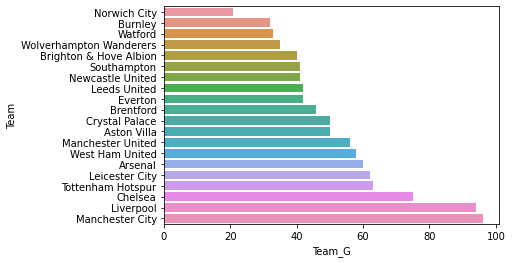

In [12]:
teamrank = teamrank.sort_values(by=['Team_G'])
# 팀 별 득점수 순위를 확인하기 위한 득점수 정렬

sns.barplot(data = teamrank, y = 'Team', x = 'Team_G')
# 막대그래프를 통한 데이터 시각화

#####⭐(공격수 + 미드필더)의 나이에 따른 평균 득점률

step1. 주 득점원은 공격과 미드필더라고 판단하고 수비와 골키퍼는 해당 데이터에서 제외하기

In [13]:
fm = FB_DF.copy() # 데이터 프레임 copy
print(f'수비수 골키퍼 제외 전 : {len(fm)}')

# 수비수, 골키퍼 제외
dg = fm[(fm['Pos']=='DF')|(fm['Pos']=='GK')].index
fm.drop(dg,inplace = True)
print(f'수비수 골키퍼 제외 후 : {len(fm)}')

수비수 골키퍼 제외 전 : 546
수비수 골키퍼 제외 후 : 319


step2. Gls컬럼과 Age컬럼을 통해 나이별 득점 분포를 알아보고 나이별 평균 득점율 구하기<br>
: (총 득점율/나이가 같은 선수 수)

In [14]:
ages = list(set((fm['Age']))) # 나이 중복 제거

gls_rate = {} # 비어있는 딕셔너리 생성

for i in range(len(ages)):
    age_per_gls =round(fm[fm['Age'] == ages[i]]['Gls'].sum()/len(fm[fm['Age'] == ages[i]]),2)
    gls_rate[ages[i]] = age_per_gls
    # gls_rate 딕셔너리 내에 나이에 따른 평균 득점 수 할당

print(f'나이별 평균 골수 : {gls_rate}') # 나이별 평균 골수


나이별 평균 골수 : {16.0: 0.0, 17.0: 0.0, 18.0: 0.0, 19.0: 1.68, 20.0: 1.19, 21.0: 2.4, 22.0: 2.75, 23.0: 2.13, 24.0: 5.1, 25.0: 2.7, 26.0: 3.45, 27.0: 1.31, 28.0: 4.18, 29.0: 5.32, 30.0: 3.63, 31.0: 2.21, 32.0: 1.17, 33.0: 0.0, 34.0: 3.43, 35.0: 0.0, 36.0: 6.67}


In [15]:
dict_ = {}
dict_['Age'] = [i for i in gls_rate.keys()]
dict_['GPA'] = [i  for i in gls_rate.values()]
# 비어 있는 딕셔너리에 Age와 GPA key 내에 나이별 평균 골수 대한 key, value 할당

age_per_gls = pd.DataFrame(dict_)
# 나이별 평균 골수 딕셔너리 데이터 프레임 형태로 변환

age_per_gls.head() # 데이터 확인

,Age,GPA
0,16.0,0.00
1,17.0,0.00
2,18.0,0.00
3,19.0,1.68
4,20.0,1.19


In [16]:
fm = pd.merge(fm,age_per_gls,how='inner', on='Age') 
# merge를 사용하여 원래 데이터 프레임에 합치기

fm[['Age','GPA']].head() # 특정 컬럼의 데이터 확인

,Age,GPA
0,19.0,1.68
1,19.0,1.68
2,19.0,1.68
3,19.0,1.68
4,19.0,1.68


In [17]:
fm.head() # 전체 데이터 확인

,Team,Nation,Pos,Age,MP,Min,Gls,CrdY,CrdR,xG,GPA
0,Arsenal,ENG,"FW,MF",19.0,38,"2,978",11.0,6.0,0.0,9.7,1.68
1,Aston Villa,ENG,"MF,FW",19.0,3,27,0.0,0.0,0.0,0.0,1.68
2,Aston Villa,ENG,FW,19.0,1,5,0.0,0.0,0.0,0.0,1.68
3,Brighton & Hove Albion,ECU,MF,19.0,8,660,1.0,2.0,0.0,0.8,1.68
4,Brighton & Hove Albion,ECU,"FW,MF",19.0,5,48,0.0,0.0,0.0,0.0,1.68


step3. 팀별 나이를 조사하고 알아낸 나이별 득점율을 통해 팀별 나이에 따른 득점률
<br>
: ((나이가 같은 인원* 나이에 따른 득점율)의 합/팀 인원 수) 계산하여 데이터프레임 만들기


In [18]:
team =list(set(fm['Team'])) #팀 리스트

gls_per_team = {}
for i in team:
    gls_per_team[i] = (round(fm[fm['Team']==i]['GPA'].sum()/len(fm[fm['Team']==i]),2))
    # 팀의 나이에 따른 득점율 = 팀별 평균골수의 합/팀 인원수

print(f'팀별 나이 분포에 따른 평균 득점율 : {gls_per_team}')

dict_ = {}
dict_['Team'] = [i for i in gls_per_team.keys()]
dict_['Team_A'] = [i  for i in gls_per_team.values()]
# 데이터 프레임 형태로 만들기 위해 딕셔너리 내에 gls_per_team의 key, value값 할당하기

팀별 나이 분포에 따른 평균 득점율 : {'Southampton': 3.07, 'Leeds United': 2.45, 'Wolverhampton Wanderers': 2.62, 'Arsenal': 2.72, 'Manchester United': 2.64, 'Newcastle United': 3.66, 'Leicester City': 3.32, 'Chelsea': 2.94, 'Burnley': 3.08, 'Aston Villa': 2.95, 'Manchester City': 2.76, 'Norwich City': 2.23, 'Brighton & Hove Albion': 2.34, 'Watford': 2.46, 'Tottenham Hotspur': 2.97, 'Crystal Palace': 3.01, 'Liverpool': 2.72, 'Everton': 2.73, 'Brentford': 2.42, 'West Ham United': 2.57}


In [19]:
team_A = pd.DataFrame(dict_)  # 나이별 평균 골수 컬럼을 추가한 팀 스탯 데이터 프레임 생성
team_A.head() # 데이터 확인

,Team,Team_A
0,Southampton,3.07
1,Leeds United,2.45
2,Wolverhampton Wanderers,2.62
3,Arsenal,2.72
4,Manchester United,2.64


In [20]:
teamrank = pd.merge(teamrank,team_A,how= 'inner', on='Team')
# 팀별 데이터프레임에 추가

teamrank.head() # 데이터 확인

,Team,Team_G,Team_A
0,Norwich City,21.0,2.23
1,Burnley,32.0,3.08
2,Watford,33.0,2.46
3,Wolverhampton Wanderers,35.0,2.62
4,Brighton & Hove Albion,40.0,2.34


step4. 팀 별 나이에 따른 평균 득점률 시각화

<AxesSubplot:xlabel='Team_A', ylabel='Team'>

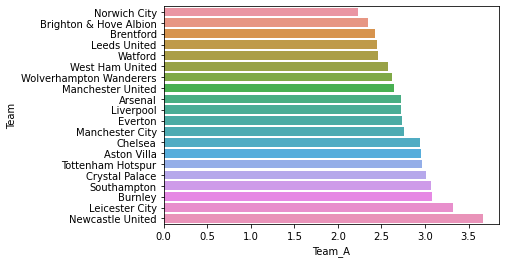

In [21]:
team_a = team_A.sort_values(by=['Team_A'])
# 팀 별 나이에 따른 평균 득점률 순위를 확인하기 위한 득점률 정렬

sns.barplot(data = team_a, y = 'Team', x = 'Team_A')
# 막대그래프를 통한 데이터 시각화


#####⭐(공격수 + 미드필더) 국적에 따른 평균 득점률


step1. Gls컬럼과 Age컬럼을 통해 국가별 득점 분포를 알아보고 국가별 평균 득점율 구하기 <br>
: (총 득점율/국가가 같은 선수 수)

: 주 득점원은 공격과 미드필더라고 판단하고 앞서 수비와 골키퍼가 제외된 fm 데이터프레임 사용

In [22]:
nations = list(set((fm['Nation']))) # 국가 중복 제거

gls_rate = {}

for i in range(len(nations)):
    Nation_per_gls =round(fm[fm['Nation'] == nations[i]]['Gls'].sum()/len(fm[fm['Nation'] == nations[i]]),2)
    gls_rate[nations[i]] = Nation_per_gls
    # gls_rate 국가별 평균 골수를 할당함(총 득점율/국가가 같은 선수 수)
    
print(f'국가별 평균 골수 :{gls_rate}') # 국가 별 평균 골수

dict_ = {}
dict_['Nation'] = [i for i in gls_rate.keys()]
dict_['GPA_N'] = [i  for i in gls_rate.values()]
# 데이터 프레임 형태로 만들기 위해 딕셔너리 내에 gls_rate의 key, value값 할당하기

국가별 평균 골수 :{'ARG': 3.5, 'GHA': 3.0, 'MLI': 1.0, 'SUI': 1.0, 'BEL': 5.75, 'ENG': 2.34, 'CZE': 2.33, 'SEN': 5.25, 'VEN': 1.0, 'NIR': 0.5, 'IRL': 0.5, 'CRO': 1.5, 'NOR': 4.25, 'ALG': 9.5, 'NGA': 2.75, 'USA': 4.0, 'COL': 3.0, 'WAL': 1.25, 'NZL': 2.5, 'POR': 5.17, 'GUI': 3.0, 'MAR': 2.0, 'MEX': 6.0, 'ECU': 0.5, 'DEN': 1.0, 'GAB': 4.0, 'TUR': 0.0, 'UKR': 1.0, 'KOR': 14.0, 'URU': 1.0, 'CIV': 6.0, 'BRA': 4.24, 'JAM': 5.5, 'KVX': 1.0, 'JPN': 3.0, 'ZIM': 0.0, 'IRN': 1.0, 'ANG': 0.0, 'POL': 0.33, 'SRB': 0.0, 'ALB': 6.0, 'TUN': 0.0, 'ZAM': 3.5, 'SCO': 1.6, 'BFA': 0.0, 'ESP': 2.25, 'GRE': 0.0, 'COD': 2.67, 'ITA': 3.0, 'ISL': 0.0, 'PAR': 1.0, 'EGY': 7.67, 'SVK': 1.0, 'SWE': 2.33, 'GRN': 1.0, 'FRA': 2.62, 'GER': 3.71, 'NED': 0.89, 'FIN': 5.5}


In [23]:
Nation_per_gls = pd.DataFrame(dict_)
Nation_per_gls.head() # 국적별 평균 골수 데이터 프레임

fm = pd.merge(fm , Nation_per_gls,how='inner', on='Nation')
# Team 컬럼을 기준으로 데이터 프레임 합치기

fm[['Nation','GPA_N']].head() # 데이터 확인

,Nation,GPA_N
0,ENG,2.34
1,ENG,2.34
2,ENG,2.34
3,ENG,2.34
4,ENG,2.34


In [24]:
fm.head() # 데이터 확인

,Team,Nation,Pos,Age,MP,Min,Gls,CrdY,CrdR,xG,GPA,GPA_N
0,Arsenal,ENG,"FW,MF",19.0,38,"2,978",11.0,6.0,0.0,9.7,1.68,2.34
1,Aston Villa,ENG,"MF,FW",19.0,3,27,0.0,0.0,0.0,0.0,1.68,2.34
2,Aston Villa,ENG,FW,19.0,1,5,0.0,0.0,0.0,0.0,1.68,2.34
3,Leeds United,ENG,"FW,MF",19.0,20,746,2.0,4.0,0.0,3.1,1.68,2.34
4,Leeds United,ENG,"MF,FW",19.0,7,237,0.0,0.0,0.0,0.4,1.68,2.34


step2. 팀별 국가를 조사하고 알아낸 국가별 득점율을 통해 팀별 국가에 따른 득점율((국가가 같은 인원* 국가에 따른 득점율)의 합/팀 인원 수) 계산하여 데이터프레임 만들기

In [25]:
team =list(set(fm['Team'])) # 팀 리스트

gls_per_team = {}

for i in team:
    gls_per_team[i] = (round(fm[fm['Team']==i]['GPA_N'].sum()/len(fm[fm['Team']==i]),2))
    # 팀의 국가에 따른 득점률 = 팀별 평균 골수의 합/팀 인원수

print(gls_per_team)

{'Southampton': 2.29, 'Leeds United': 1.91, 'Wolverhampton Wanderers': 5.01, 'Arsenal': 3.5, 'Manchester United': 2.27, 'Newcastle United': 2.36, 'Leicester City': 2.9, 'Chelsea': 2.92, 'Burnley': 2.34, 'Aston Villa': 2.78, 'Manchester City': 3.69, 'Norwich City': 2.22, 'Brighton & Hove Albion': 2.11, 'Watford': 2.65, 'Tottenham Hotspur': 3.11, 'Crystal Palace': 2.85, 'Liverpool': 3.53, 'Everton': 2.41, 'Brentford': 2.16, 'West Ham United': 3.02}


In [26]:
dict_ = {}
dict_['Team'] = [i for i in gls_per_team.keys()]
dict_['Team_N'] = [i  for i in gls_per_team.values()]


team_N = pd.DataFrame(dict_)
# 국가별 평균 득점률 딕셔너리 데이터 프레임 형태로 변환

team_N.head() # 데이터 확인

,Team,Team_N
0,Southampton,2.29
1,Leeds United,1.91
2,Wolverhampton Wanderers,5.01
3,Arsenal,3.50
4,Manchester United,2.27


In [27]:
teamrank = pd.merge(teamrank,team_N, how = 'inner', on= 'Team')
# 팀별 데이터프레임에 추가

teamrank.head() # 데이터 확인

,Team,Team_G,Team_A,Team_N
0,Norwich City,21.0,2.23,2.22
1,Burnley,32.0,3.08,2.34
2,Watford,33.0,2.46,2.65
3,Wolverhampton Wanderers,35.0,2.62,5.01
4,Brighton & Hove Albion,40.0,2.34,2.11


step3. 팀 별 국적에 따른 평균 득점률 시각화




<AxesSubplot:xlabel='Team_N', ylabel='Team'>

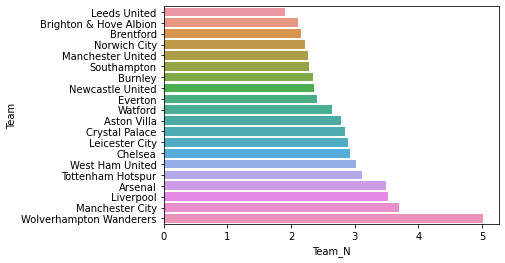

In [28]:
team_n = team_N.sort_values(by=['Team_N'])
# 팀 별 국적에 따른 평균 득점률 순위를 확인하기 위한 득점률 정렬

sns.barplot(data = team_n, y = 'Team', x = 'Team_N')
# 막대그래프를 통한 데이터 시각화

#####⭐선수별 평균 지구력


step1. 선수별 지구력을 구하기 위해 (출정시간 / 출정횟수) 계산 하기
<br>
: 오류 발생 타입이 맞지 않는 에러 발생 PB_DF["Min"][0] : str, PB_DF["MP"][0]: int

In [29]:
FB_DF["Min"] = FB_DF["Min"].str.replace(",", "")
# 문자열 하나하나 쪼개서 반점 발견되면 삭제하기

FB_DF["Min"] = FB_DF["Min"].astype(int)
# FB_DF["Min"] 내의 데이터 문자열에서 int형으로 변환

FB_DF["endurance"] = round(FB_DF["Min"] / FB_DF["MP"], 3)
# 지구력 계산하기, (출정시간 / 출정횟수)

FB_DF.head() # 데이터 확인

,Team,Nation,Pos,Age,MP,Min,Gls,CrdY,CrdR,xG,endurance
0,Arsenal,ENG,"FW,MF",19.0,38,2978,11.0,6.0,0.0,9.7,78.368
1,Arsenal,BRA,DF,23.0,35,3063,5.0,8.0,1.0,2.7,87.514
2,Arsenal,ENG,GK,23.0,34,3060,0.0,1.0,0.0,0.0,90.000
3,Arsenal,ENG,DF,23.0,32,2880,0.0,3.0,0.0,1.0,90.000
4,Arsenal,NOR,MF,22.0,36,2785,7.0,4.0,0.0,4.8,77.361


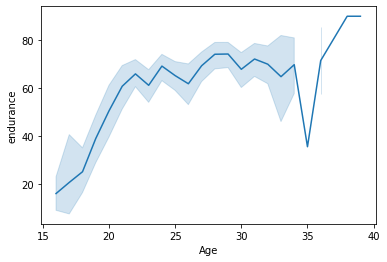

In [30]:
# 선수별 나이에 따른 지구력 분포 확인
sns.lineplot(data=FB_DF, x="Age", y="endurance")
plt.show()

In [31]:
print(FB_DF[FB_DF["endurance"] == 90.0][:6])
#
# 출력을 해보니 나이가 많은데 지구력이 높은 사람들이 많아 따로 확인 해 보니
# 골키퍼가 대부분을 차지하는 것을 확인 할 수 있었다.

           Team Nation Pos   Age  MP   Min  Gls  CrdY  CrdR   xG  endurance
2       Arsenal    ENG  GK  23.0  34  3060  0.0   1.0   0.0  0.0       90.0
3       Arsenal    ENG  DF  23.0  32  2880  0.0   3.0   0.0  1.0       90.0
20      Arsenal    GER  GK  29.0   4   360  0.0   0.0   0.0  0.0       90.0
22      Arsenal    ESP  DF  27.0   2   180  0.0   1.0   0.0  0.3       90.0
28  Aston Villa    ARG  GK  28.0  36  3240  0.0   4.0   0.0  0.0       90.0
51  Aston Villa    SWE  GK  31.0   1    90  0.0   0.0   0.0  0.0       90.0


step2. 팀 별 평균 지구력 계산하기
<br>
: 골키퍼는 경기에 계속 참여하였기에 지구력이 높게 나와 골기퍼 포지션 제외하고 계산

In [32]:
print(f'골키퍼 제외 전 : {len(FB_DF)}')

GK = FB_DF[FB_DF["Pos"] == "GK"].index
# 포지션이 골키퍼에 해당하는 인덱스 추출

R_FB_DF = FB_DF.drop(GK) 
# 포지션이 골키퍼에 해당하는 인덱스 삭제

print(f'골키퍼 제외 후 : {len(R_FB_DF)}')

골키퍼 제외 전 : 546
골키퍼 제외 후 : 504


In [33]:
R_FB_DF.head() # 데이터 확인

,Team,Nation,Pos,Age,MP,Min,Gls,CrdY,CrdR,xG,endurance
0,Arsenal,ENG,"FW,MF",19.0,38,2978,11.0,6.0,0.0,9.7,78.368
1,Arsenal,BRA,DF,23.0,35,3063,5.0,8.0,1.0,2.7,87.514
3,Arsenal,ENG,DF,23.0,32,2880,0.0,3.0,0.0,1.0,90.000
4,Arsenal,NOR,MF,22.0,36,2785,7.0,4.0,0.0,4.8,77.361
5,Arsenal,SUI,"MF,DF",28.0,27,2327,1.0,10.0,1.0,1.2,86.185


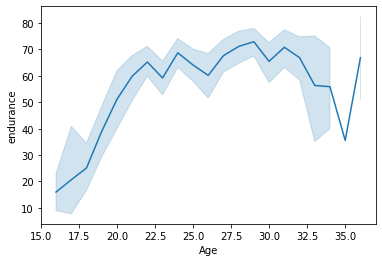

In [34]:
# 선수별 공격수 득점 분포 확인 (골키퍼 제외)
sns.lineplot(data=R_FB_DF, x="Age", y="endurance")
plt.show()

In [35]:
# 팀 별 평균 지구력 계산하기

Team = {}

for i in R_FB_DF["Team"]: # 팀에 해당하는 데이터 i에 할당
    if i in Team: # 비어있는 딕셔너리 내에 데이터가 존재할 경우
      Team[i] += 1 # +1:count
    else: # 존재하지 않을 경우
      Team[i] = 1 # 처음 count: 1

print(Team) # 팀 당 골키퍼 제외 인원 수 딕셔너리

{'Arsenal': 25, 'Aston Villa': 28, 'Brentford': 26, 'Brighton & Hove Albion': 24, 'Burnley': 21, 'Chelsea': 24, 'Crystal Palace': 22, 'Everton': 31, 'Leeds United': 27, 'Leicester City': 26, 'Liverpool': 25, 'Manchester City': 24, 'Manchester United': 28, 'Newcastle United': 26, 'Norwich City': 26, 'Southampton': 22, 'Tottenham Hotspur': 24, 'Watford': 28, 'West Ham United': 23, 'Wolverhampton Wanderers': 24}


In [36]:
R_FB_DF.head() # 데이터 확인

,Team,Nation,Pos,Age,MP,Min,Gls,CrdY,CrdR,xG,endurance
0,Arsenal,ENG,"FW,MF",19.0,38,2978,11.0,6.0,0.0,9.7,78.368
1,Arsenal,BRA,DF,23.0,35,3063,5.0,8.0,1.0,2.7,87.514
3,Arsenal,ENG,DF,23.0,32,2880,0.0,3.0,0.0,1.0,90.000
4,Arsenal,NOR,MF,22.0,36,2785,7.0,4.0,0.0,4.8,77.361
5,Arsenal,SUI,"MF,DF",28.0,27,2327,1.0,10.0,1.0,1.2,86.185


In [37]:
Team_e = {}

for i, j in enumerate(R_FB_DF["Team"]): # 팀명에 따른 인덱스와 데이터 할당
  if j in Team_e: # 비어있는 딕셔너리 내에 데이터가 존재할 경우
    Team_e[j] += R_FB_DF.iloc[i]["endurance"] # 지구력 더함
  else: # 존재하지 않을 경우
    Team_e[j] = R_FB_DF.iloc[i]["endurance"] # 초기 지구력 설정

for i in Team_e.keys():
    Team_e[i] = round(Team_e[i]/Team[i], 3)
    # 각 팀에 따른 최종 평균 지구력 딕셔너리

print(Team_e)

{'Arsenal': 64.325, 'Aston Villa': 52.683, 'Brentford': 57.53, 'Brighton & Hove Albion': 59.9, 'Burnley': 69.512, 'Chelsea': 64.211, 'Crystal Palace': 62.947, 'Everton': 55.829, 'Leeds United': 57.812, 'Leicester City': 65.164, 'Liverpool': 58.257, 'Manchester City': 61.669, 'Manchester United': 58.002, 'Newcastle United': 67.293, 'Norwich City': 62.694, 'Southampton': 64.425, 'Tottenham Hotspur': 61.471, 'Watford': 64.007, 'West Ham United': 56.144, 'Wolverhampton Wanderers': 61.861}


In [38]:
Team_E = pd.DataFrame()

Team_E["Team"] = Team_e.keys()
Team_E["Team_E"] = Team_e.values()
# 팀 별 평균 지구력 데이터 프레임 생성

teamrank = pd.merge(teamrank, Team_E, on = 'Team')
# 팀별 데이터프레임에 추가

teamrank.head() # 데이터 확인

,Team,Team_G,Team_A,Team_N,Team_E
0,Norwich City,21.0,2.23,2.22,62.694
1,Burnley,32.0,3.08,2.34,69.512
2,Watford,33.0,2.46,2.65,64.007
3,Wolverhampton Wanderers,35.0,2.62,5.01,61.861
4,Brighton & Hove Albion,40.0,2.34,2.11,59.900


#####⭐경고 카드 평균 누적량


step1. 팀별로 옐로카드와 (레드카드)*2를 합산하여 옐로 카드의 누적치 구하기

In [39]:
teams =  list(set(FB_DF['Team']))

team_crds ={}
for i in teams:
    y = FB_DF[FB_DF['Team']==i]['CrdY'].sum() # 총 옐로카드 수
    r = FB_DF[FB_DF['Team']==i]['CrdR'].sum()*2 # 총 레드카드 수 = 옐로카드 * 2
    team_crds[i] = y+r

print(f' 팀별 카드수 : {team_crds}')

dict_ = {}
dict_['Team'] = [i for i in team_crds.keys()]
dict_['Team_C'] = [i  for i in team_crds.values()]
# 데이터 프레임 형태로 만들기 위해 딕셔너리 내에 team_crds의 key, value값 할당하기

team_C = pd.DataFrame(dict_)
# 팀 별 카드 누적 수 딕셔너리 데이터 프레임 형태로 변환

team_C.head() # 데이터 확인

 팀별 카드수 : {'Southampton': 69.0, 'Leeds United': 106.0, 'Wolverhampton Wanderers': 66.0, 'Arsenal': 75.0, 'Manchester United': 81.0, 'Newcastle United': 85.0, 'Burnley': 72.0, 'Chelsea': 65.0, 'Leicester City': 57.0, 'Aston Villa': 85.0, 'Manchester City': 44.0, 'Norwich City': 59.0, 'Brighton & Hove Albion': 76.0, 'Watford': 69.0, 'Tottenham Hotspur': 71.0, 'Crystal Palace': 71.0, 'Liverpool': 52.0, 'Everton': 94.0, 'Brentford': 71.0, 'West Ham United': 58.0}


,Team,Team_C
0,Southampton,69.0
1,Leeds United,106.0
2,Wolverhampton Wanderers,66.0
3,Arsenal,75.0
4,Manchester United,81.0


In [40]:
teamrank = pd.merge(teamrank, team_C, how = 'inner', on= 'Team')
# 팀별 데이터프레임에 추가

teamrank.head() # 데이터 확인

,Team,Team_G,Team_A,Team_N,Team_E,Team_C
0,Norwich City,21.0,2.23,2.22,62.694,59.0
1,Burnley,32.0,3.08,2.34,69.512,72.0
2,Watford,33.0,2.46,2.65,64.007,69.0
3,Wolverhampton Wanderers,35.0,2.62,5.01,61.861,66.0
4,Brighton & Hove Albion,40.0,2.34,2.11,59.900,76.0


step2. 팀 별 누적 카드 수 시각화

<AxesSubplot:xlabel='Team_C', ylabel='Team'>

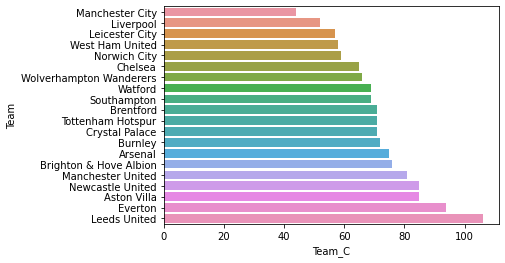

In [41]:
team_c = team_C.sort_values(by=['Team_C'])
# 팀 별 누적 카드수에 따른 순위를 확인하기 위한 누적 카드 수 정렬

sns.barplot(data = team_c, y = 'Team', x = 'Team_C')
# 막대그래프를 통한 데이터 시각화

#####⭐(실제 골 - 예상 골) 평균 수치

step1. step1. 선수별 (실제 골 - 예상 골) 구하기

In [42]:
R_FB_DF["Gls-xG"] = R_FB_DF["Gls"] - R_FB_DF["xG"]
# 선수별 (실제 골 - 예상 골)을 나타내는 새로운 컬럼 생성

R_FB_DF.head()

,Team,Nation,Pos,Age,MP,Min,Gls,CrdY,CrdR,xG,endurance,Gls-xG
0,Arsenal,ENG,"FW,MF",19.0,38,2978,11.0,6.0,0.0,9.7,78.368,1.3
1,Arsenal,BRA,DF,23.0,35,3063,5.0,8.0,1.0,2.7,87.514,2.3
3,Arsenal,ENG,DF,23.0,32,2880,0.0,3.0,0.0,1.0,90.000,-1.0
4,Arsenal,NOR,MF,22.0,36,2785,7.0,4.0,0.0,4.8,77.361,2.2
5,Arsenal,SUI,"MF,DF",28.0,27,2327,1.0,10.0,1.0,1.2,86.185,-0.2


In [43]:
Team_F = {}

for i, j in enumerate(R_FB_DF["Team"]): # 팀명에 따른 인덱스와 데이터 할당
  if j in Team_F:  # 비어있는 딕셔너리 내에 데이터가 존재할 경우
    Team_F[j] += R_FB_DF.iloc[i]["Gls-xG"] # (실제 골 - 예상 골) 수치 더함
  else: # 존재하지 않을 경우
    Team_F[j] = R_FB_DF.iloc[i]["Gls-xG"] # 초기 (실제 골 - 예상 골) 수치 설정

for i in Team_F.keys():
  if Team_F[i]:
    Team_F[i] = round(Team_F[i]/Team[i], 3)
     # 각 팀에 따른 최종 평균(실제 골 - 예상 골) 수치 딕셔너리

print(Team_F)

{'Arsenal': -0.056, 'Aston Villa': 0.189, 'Brentford': -0.088, 'Brighton & Hove Albion': -0.279, 'Burnley': -0.371, 'Chelsea': 0.25, 'Crystal Palace': 0.141, 'Everton': -0.045, 'Leeds United': -0.226, 'Leicester City': 0.396, 'Liverpool': 0.116, 'Manchester City': 0.213, 'Manchester United': 0.032, 'Newcastle United': -0.012, 'Norwich City': -0.508, 'Southampton': -0.3, 'Tottenham Hotspur': -0.125, 'Watford': -0.221, 'West Ham United': 0.304, 'Wolverhampton Wanderers': -0.071}


In [44]:
Team_F_ = pd.DataFrame()

Team_F_["Team"] = Team_F.keys()
Team_F_["Team_F"] = Team_F.values()
# 팀 별 평균 (실제 골 - 예상 골) 데이터 프레임 생성

teamrank = pd.merge(teamrank, Team_F_, on = 'Team')
# 팀별 데이터프레임에 추가

teamrank.head() # 데이터 확인

,Team,Team_G,Team_A,Team_N,Team_E,Team_C,Team_F
0,Norwich City,21.0,2.23,2.22,62.694,59.0,-0.508
1,Burnley,32.0,3.08,2.34,69.512,72.0,-0.371
2,Watford,33.0,2.46,2.65,64.007,69.0,-0.221
3,Wolverhampton Wanderers,35.0,2.62,5.01,61.861,66.0,-0.071
4,Brighton & Hove Albion,40.0,2.34,2.11,59.900,76.0,-0.279


### ⚽ 승점 데이터프레임 생성


In [45]:
# 팀 별 컬럼에 따른 평균 승점을 저장해 주기 위한 함수 생성

def score_pred(col):
    Score = {}

    for i in range(len(teamrank)): # 각 컬럼 길이
        sum = 0 # 승점
        for j in teamrank[col]: # 각 컬럼 값
        
            if col == "Team_C": # 만약 승점 계산 할 컬럼이 Team_C 라면
              if teamrank[col][i] < j: # 다른 팀과 비교 했을 때 졌으면 +3점
                sum += 3
              elif teamrank[col][i] == j: 
                sum += 1 # 다른 팀과 비교 했을 때 같으면 +1점
              
            else:
              if teamrank[col][i] > j: # 승점 계산 할 팀의 데이터가
                  sum += 3  # 다른 팀과 비교 했을 때 이겼으면 +3점
              elif teamrank[col][i] == j:
                  sum += 1 # 다른 팀과 비교 했을 때 같으면 +1점
        sum -=1 # 자기 자신과의 경기 : 무승부 일 때의 1 마이너스

        Score[teamrank['Team'][i]] = sum
        # 각 컬럼에 해당하는 데이터 최종 승점 컬럼 승점 데이터 프레임에 삽입

    dict_ = {}
    dict_['Team'] = [i for i in Score.keys()]
    dict_[col+'_S'] = [i  for i in Score.values()]
    # 각 팀의 승점을 의미하는 딕셔너리 생성

    rank = pd.DataFrame(dict_)
    # 각 컬럼에 대한 승점 딕셔너리 데이터 프레임 형태로 변환
    
    return rank
    # 각 컬럼에 대한 승점 데이터 프레임 반환


In [46]:
scores = pd.DataFrame(data = list(set(FB_DF['Team'])),columns=['Team'])
# 승점 저장을 위한 팀 데이터 프레임 생성

scores.head() # 데이터 확인

,Team
0,Southampton
1,Leeds United
2,Wolverhampton Wanderers
3,Arsenal
4,Manchester United


In [47]:
cols = teamrank.columns[1:]
# 승점 계산을 위한 각 컬럼 이름 리스트

for i in cols:
    data = score_pred(i)
    # score_pred 함수를 통해 각 컬럼에 대한 예상 승점 데이터 계산

    scores = pd.merge(scores, data, how='inner',on='Team')
    # 각 컬럼에 대힌 승점 데이터 프레임 모두 합치기

scores.head() # 데이터 확인

,Team,Team_G_S,Team_A_S,Team_N_S,Team_E_S,Team_C_S,Team_F_S
0,Southampton,16,48,15,48,34,6
1,Leeds United,22,9,0,12,0,12
2,Wolverhampton Wanderers,9,18,57,30,39,24
3,Arsenal,42,25,48,45,18,27
4,Manchester United,36,21,12,15,12,36


In [48]:
pred_s = {}

for i in range(len(scores)):
    col = scores.iloc[i]
    pred_s[col[0]] = round(col[1:].sum()/len(scores.columns)-1,2)
    # 각 컬럼 별 예상 승점을 모두 더해 평균 계산

dict_= {}
dict_['Team'] = [i for i in pred_s.keys()]
dict_['Pred_S'] = [i for i in pred_s.values()]
# 각 컬럼 별 평균 예상 승점 딕셔너리 생성

pred_S = pd.DataFrame(dict_)
# 각 컬럼에 대한 평균 승점 딕셔너리 데이터 프레임 형태로 변환

scores = pd.merge(scores, pred_S,how='inner',on='Team')
# 승점 데이터 프레임 생성

scores.head() # 데이터 확인

,Team,Team_G_S,Team_A_S,Team_N_S,Team_E_S,Team_C_S,Team_F_S,Pred_S
0,Southampton,16,48,15,48,34,6,22.86
1,Leeds United,22,9,0,12,0,12,6.86
2,Wolverhampton Wanderers,9,18,57,30,39,24,24.29
3,Arsenal,42,25,48,45,18,27,28.29
4,Manchester United,36,21,12,15,12,36,17.86


### ⚽ 실제 승점과 비교분석하기

step1. 실제 승점 가져오기

In [49]:
# 실제 승점 가져오기
real_s_path = "points_table.csv" # 승점 데이터 저장된 파일
Real_S = pd.read_csv(real_s_path)

Real_S =Real_S[['Team','Pts']] # 실제 승점 컬럼만 추출

Real_S.rename(columns={'Pts':'Real_S'}, inplace = True) # 컬럼명 수정

Real_S.head() # 데이터 확인

,Team,Real_S
0,Manchester City,93
1,Liverpool,92
2,Chelsea,74
3,Tottenham Hotspur,71
4,Arsenal,69


In [50]:
scores = pd.merge(scores,Real_S,how='inner',on='Team')
# 승점 데이터 프레임에 실제 승점 매치

scores.head() # 데이터 확인

,Team,Team_G_S,Team_A_S,Team_N_S,Team_E_S,Team_C_S,Team_F_S,Pred_S,Real_S
0,Southampton,16,48,15,48,34,6,22.86,40
1,Leeds United,22,9,0,12,0,12,6.86,38
2,Wolverhampton Wanderers,9,18,57,30,39,24,24.29,51
3,Arsenal,42,25,48,45,18,27,28.29,69
4,Manchester United,36,21,12,15,12,36,17.86,58


In [51]:
# 승점 기반 순위
scores['Pred_R'] = scores['Pred_S'].rank(ascending=False) # 예상 승점 순위
scores['Real_R'] = scores['Real_S'].rank(ascending=False) # 실제 승점 순위

scores.head()

,Team,Team_G_S,Team_A_S,Team_N_S,Team_E_S,Team_C_S,Team_F_S,Pred_S,Real_S,Pred_R,Real_R
0,Southampton,16,48,15,48,34,6,22.86,40,11.0,14.0
1,Leeds United,22,9,0,12,0,12,6.86,38,19.0,16.0
2,Wolverhampton Wanderers,9,18,57,30,39,24,24.29,51,10.0,9.0
3,Arsenal,42,25,48,45,18,27,28.29,69,6.0,5.0
4,Manchester United,36,21,12,15,12,36,17.86,58,15.0,6.0


step2. 실제 승점과의 상관관계 시각화

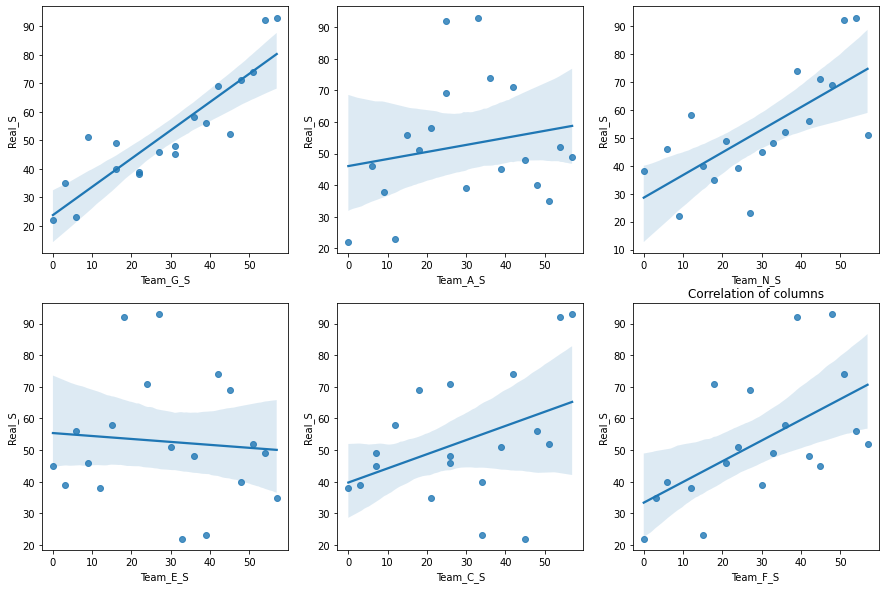

In [52]:
fig,ax = plt.subplots(2, 3,figsize=(15,10))

plt.title('Correlation of columns')

columns = [["Team_G_S",	"Team_A_S",	"Team_N_S"],	["Team_E_S",	"Team_C_S",	"Team_F_S"]]
# 상관관계를 확인하기 위한 컬럼명 리스트

count = 0

for cols in columns:
  for index, col in enumerate(cols):
    sns.regplot(x = col, y = 'Real_S', data = scores, ax= ax[count,index])
    # 실제 승점과의 상관관계를 보기 위한 산점도

    ax[count, index].set_xlabel(col) # x축 컬럼명
    ax[count, index].set_ylabel('Real_S') # y축 컬럼명
  count += 1

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


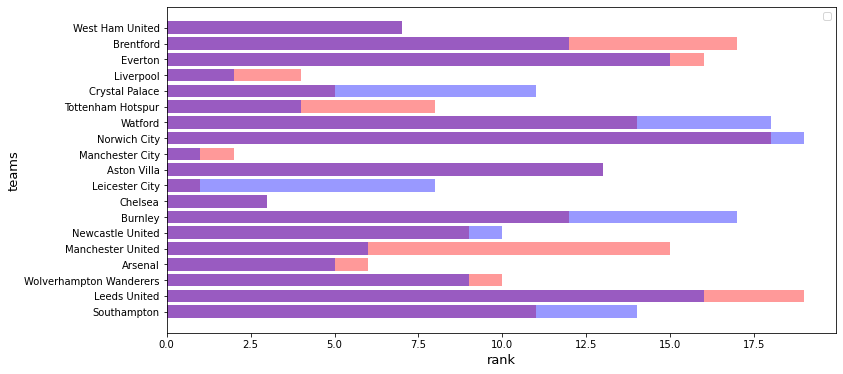

In [87]:
# 그림 사이즈, 바 굵기 조정
fig, ax = plt.subplots(figsize=(12,6))
bar_width = 0.25

# 각 연도별로 3개 샵의 bar를 순서대로 나타내는 과정, 각 그래프는 0.25의 간격을 두고 그려짐
b1 = plt.barh(scores['Team'],scores['Pred_R'], alpha=0.4, color='red')

b2 = plt.barh(scores['Team'],scores['Real_R'], alpha=0.4, color='blue')

# x축, y축 이름 및 범례 설정
plt.xlabel('rank', size = 13)
plt.ylabel('teams', size = 13)
plt.legend()
plt.show()

<AxesSubplot:>

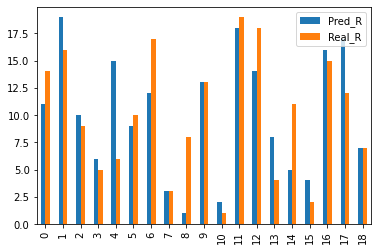

In [74]:
# 실제순위, 예상순위 그래프
scores[['Pred_R','Real_R']].plot(kind = 'bar')

### ⚽ 결론

    - 6개 컬럼에 대해 실제 순위와의 상관관계를 확인해 보았다.
    - 국가별 득점율(Team_N_S)의 경우 '많은 상관관계를 보이지 않을것이다'라는 가정하에 프로젝트를 진행하였는데 그래프로 보기에 상당한 상관관계를 보여주었다.
    - 지구력(Team_E_S)의 경우 생각보다 많은 관계를 보이지 않은것 같다.
    - 결론적으로 실제순위와 예상순위가 많은 차이를 보이지 않아 생각보다 좋은 결과가 나온것 같다.